### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼만큼 발생하는지 회귀 예측 진행

In [1]:
import numpy as np
import pandas as pd 

In [2]:
a_df = pd.read_csv('./datasets/advertising.csv')
a_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [162]:
a_df = a_df.drop(labels=['Unnamed: 0'], axis=1)
a_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [163]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [164]:
a_df.corr()['Sales'].sort_values(ascending=False)[1:]
# TV 광고 종목이 가장 수익 높음 

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

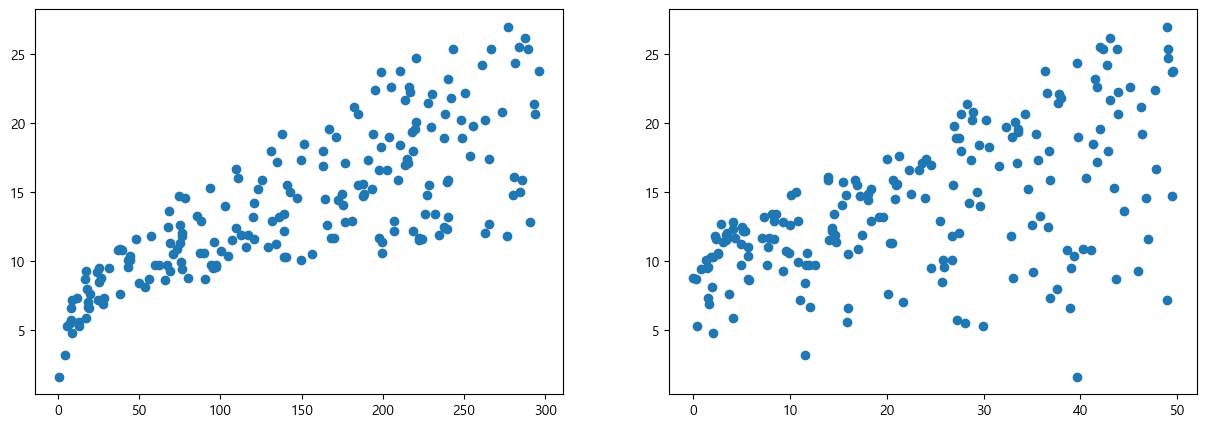

In [165]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1 ,2 ,figsize=(15,5))

axes[0].scatter(a_df['TV'], a_df['Sales'])
axes[1].scatter(a_df['Radio'] , a_df['Sales'])

plt.show()

In [6]:
pre_df = a_df[['TV' , 'Sales']]
pre_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [7]:
pre_c_df  = a_df[['Radio' , 'Sales']]
pre_c_df

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9
...,...,...
195,3.7,7.6
196,4.9,9.7
197,9.3,12.8
198,42.0,25.5


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

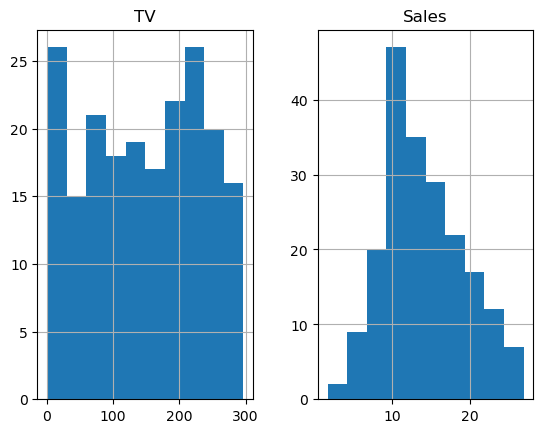

In [8]:
pre_df.hist()

In [9]:
# pre_df['TV'] = np.log1p(pre_df['TV'])
# pre_df['TV'].hist()

array([[<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

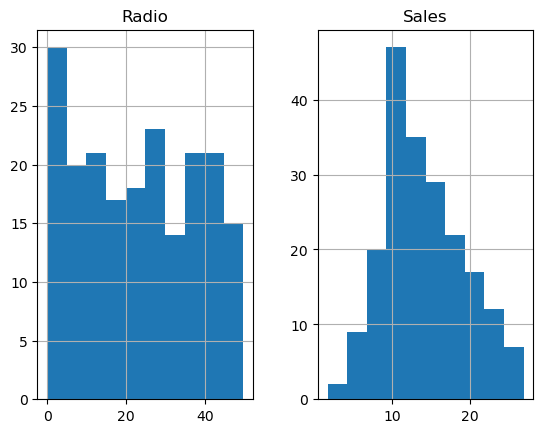

In [10]:
pre_c_df.hist()

In [11]:
from sklearn.model_selection import train_test_split
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


In [12]:
from sklearn.model_selection import train_test_split
features1, targets1 = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X1_train, X1_test, y1_train, y1_test = \
train_test_split(features1, targets1, test_size=0.2, random_state=124)

In [13]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

# 가중치 초기화 (0으로 초기화)
W = torch.zeros(1)

# 편향 초기화 (0으로 초기화)
b = torch.zeros(1)

print(W, b)

tensor([0.]) tensor([0.])


In [14]:
# 가설 선언 
H = W * X_train + b
print(H)

      TV
192  0.0
93   0.0
98   0.0
23   0.0
198  0.0
..   ...
169  0.0
194  0.0
135  0.0
17   0.0
156  0.0

[160 rows x 1 columns]


In [15]:
H1 = W * X1_train + b
print(H1)

     Radio
192    0.0
93     0.0
98     0.0
23     0.0
198    0.0
..     ...
169    0.0
194    0.0
135    0.0
17     0.0
156    0.0

[160 rows x 1 columns]


In [16]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self) :
        super().__init__()
        self.linear = Linear(1, 1)

    # model(X_train) 호출 시 forward(X_train) 자동 실행 
    def forward(self, x):
        # 전처리 과정도 넣을 수 있음 
        return self.linear(x)

In [17]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(), lr=0.0000001)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

 100/10000: W: -0.3439, b: 0.2641, loss: 5520.0156
 200/10000: W: -0.1515, b: 0.2651, loss: 1674.3474
 300/10000: W: -0.0461, b: 0.2657, loss: 518.5214
 400/10000: W: 0.0117, b: 0.2660, loss: 171.1346
 500/10000: W: 0.0434, b: 0.2662, loss: 66.7265
 600/10000: W: 0.0608, b: 0.2663, loss: 35.3462
 700/10000: W: 0.0703, b: 0.2664, loss: 25.9147
 800/10000: W: 0.0756, b: 0.2664, loss: 23.0800
 900/10000: W: 0.0784, b: 0.2665, loss: 22.2280
1000/10000: W: 0.0800, b: 0.2665, loss: 21.9718
1100/10000: W: 0.0809, b: 0.2666, loss: 21.8947
1200/10000: W: 0.0813, b: 0.2666, loss: 21.8715
1300/10000: W: 0.0816, b: 0.2666, loss: 21.8645
1400/10000: W: 0.0817, b: 0.2667, loss: 21.8623
1500/10000: W: 0.0818, b: 0.2667, loss: 21.8615
1600/10000: W: 0.0818, b: 0.2667, loss: 21.8612
1700/10000: W: 0.0819, b: 0.2668, loss: 21.8611
1800/10000: W: 0.0819, b: 0.2668, loss: 21.8610
1900/10000: W: 0.0819, b: 0.2668, loss: 21.8608
2000/10000: W: 0.0819, b: 0.2669, loss: 21.8607
2100/10000: W: 0.0819, b: 0.266

### Linear 라이브러리 사용

In [170]:
# linear 라이브러리 사용

from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.nn import Linear
from torch.optim import SGD

torch.manual_seed(124)

from sklearn.model_selection import train_test_split
features1, targets1 = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X1_train, X1_test, y1_train, y1_test = \
train_test_split(features1, targets1, test_size=0.2, random_state=124)


X1_train = torch.FloatTensor(X1_train.values)
y1_train = torch.FloatTensor(y1_train.values).view(-1, 1)

X1_test = torch.FloatTensor(X1_test.values)
y1_test = torch.FloatTensor(y1_test.values).view(-1, 1)

l_r = Linear(1, 1)
optimizer = SGD(l_r.parameters(), lr=0.001)

epochs = 50000

for epoch in range(1, epochs + 1):
    H1 = l_r(X1_train)
    loss = mse_loss(H1, y1_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

 100/50000: W: 0.0001, b: 2.8102, loss: 158.4855
 200/50000: W: 0.5678, b: 4.8946, loss: 111.5178
 300/50000: W: 1.0317, b: 6.5998, loss: 80.0900
 400/50000: W: 1.4107, b: 7.9947, loss: 59.0604
 500/50000: W: 1.7203, b: 9.1359, loss: 44.9887
 600/50000: W: 1.9733, b: 10.0695, loss: 35.5727
 700/50000: W: 2.1800, b: 10.8333, loss: 29.2722
 800/50000: W: 2.3489, b: 11.4581, loss: 25.0563
 900/50000: W: 2.4868, b: 11.9693, loss: 22.2352
1000/50000: W: 2.5995, b: 12.3874, loss: 20.3475
1100/50000: W: 2.6916, b: 12.7295, loss: 19.0844
1200/50000: W: 2.7669, b: 13.0094, loss: 18.2392
1300/50000: W: 2.8283, b: 13.2384, loss: 17.6736
1400/50000: W: 2.8785, b: 13.4257, loss: 17.2952
1500/50000: W: 2.9196, b: 13.5789, loss: 17.0420
1600/50000: W: 2.9531, b: 13.7043, loss: 16.8725
1700/50000: W: 2.9804, b: 13.8068, loss: 16.7591
1800/50000: W: 3.0028, b: 13.8907, loss: 16.6833
1900/50000: W: 3.0211, b: 13.9593, loss: 16.6325
2000/50000: W: 3.0360, b: 14.0155, loss: 16.5985
2100/50000: W: 3.0482, 

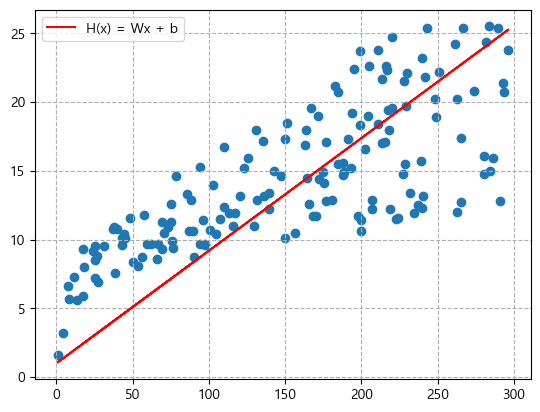

In [34]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0819 * X_train + 1, color="red", label='H(x) = Wx + b')
plt.grid(visible=True, linestyle='--')
plt.legend()
plt.show()


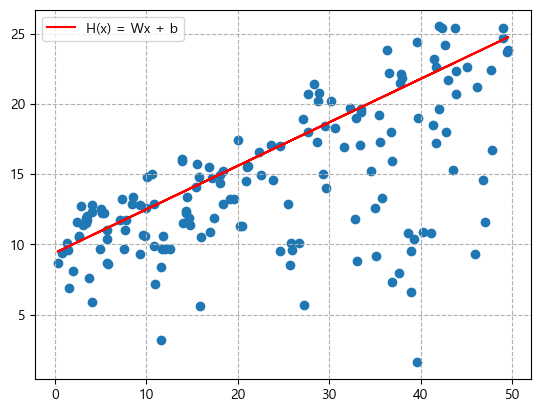

In [36]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X1_train, y1_train)
plt.plot(X1_train, 0.3095 * X1_train + 9.3935, color="red", label='H(x) = Wx + b')
plt.grid(visible=True, linestyle='--')
plt.legend()
plt.show()

In [37]:
H = 0.0819 * X_test + 1
print(X_test[1]) 
print(H[1]) 

# RMSE
print(np.sqrt(mse_loss(H , y_test).item()))

tensor([287.6000])
tensor([24.5544])
4.5199319436005085


In [23]:
# TV

print(y_train)
print(0.0819 * X_train + 1)

print('=' * 40)

print(('정답', '예측'))
for eval in zip(y_train, 0.0819 * X_train + 1):
    print(eval)

tensor([[ 5.9000],
        [22.2000],
        [25.4000],
        [15.5000],
        [25.5000],
        [ 9.7000],
        [10.5000],
        [21.5000],
        [17.3000],
        [ 6.9000],
        [19.6000],
        [11.7000],
        [18.0000],
        [10.8000],
        [17.4000],
        [12.8000],
        [11.7000],
        [ 7.6000],
        [11.8000],
        [19.4000],
        [ 8.4000],
        [10.6000],
        [11.4000],
        [ 9.6000],
        [19.7000],
        [23.2000],
        [ 9.9000],
        [ 9.6000],
        [ 3.2000],
        [19.2000],
        [ 5.6000],
        [18.5000],
        [17.0000],
        [23.7000],
        [12.0000],
        [12.3000],
        [11.9000],
        [18.4000],
        [15.2000],
        [11.9000],
        [24.7000],
        [21.8000],
        [19.6000],
        [10.8000],
        [10.4000],
        [23.8000],
        [14.6000],
        [22.1000],
        [ 8.7000],
        [17.1000],
        [ 8.8000],
        [19.0000],
        [10.

In [40]:
# Radio

print(y1_train)
print(0.0819 * X1_train + 1)

print('=' * 40)

print(('정답', '예측'))
for eval in zip(y1_train, 0.3095 * X1_train + 9.3935):
    print(eval)

tensor([[ 5.9000],
        [22.2000],
        [25.4000],
        [15.5000],
        [25.5000],
        [ 9.7000],
        [10.5000],
        [21.5000],
        [17.3000],
        [ 6.9000],
        [19.6000],
        [11.7000],
        [18.0000],
        [10.8000],
        [17.4000],
        [12.8000],
        [11.7000],
        [ 7.6000],
        [11.8000],
        [19.4000],
        [ 8.4000],
        [10.6000],
        [11.4000],
        [ 9.6000],
        [19.7000],
        [23.2000],
        [ 9.9000],
        [ 9.6000],
        [ 3.2000],
        [19.2000],
        [ 5.6000],
        [18.5000],
        [17.0000],
        [23.7000],
        [12.0000],
        [12.3000],
        [11.9000],
        [18.4000],
        [15.2000],
        [11.9000],
        [24.7000],
        [21.8000],
        [19.6000],
        [10.8000],
        [10.4000],
        [23.8000],
        [14.6000],
        [22.1000],
        [ 8.7000],
        [17.1000],
        [ 8.8000],
        [19.0000],
        [10.

#### 📌 전처리 후 다시 결과 확인 (이상치 제거)

<Axes: >

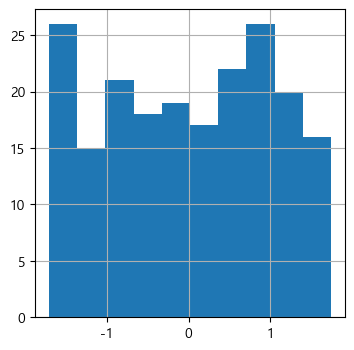

In [47]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 'TV' 열에 대해 표준화 수행
pre_df['TV'] = scaler.fit_transform(pre_df[['TV']])

# 결과 확인
pre_df['TV'].hist(figsize=(4,4))

In [50]:
a1 = pre_df['TV'] >= -1.96
a2 = pre_df['TV'] <= 1.96
a = a1 & a2

pre_df = pre_df.loc[pre_df[a].index].reset_index(drop=True)

<Axes: >

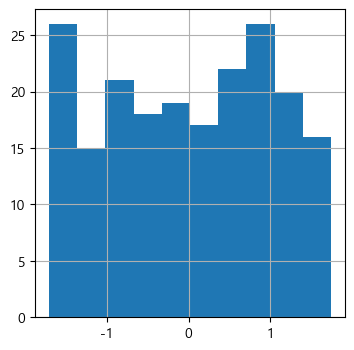

In [48]:
pre_df['TV'].hist(figsize=(4,4))

<Axes: >

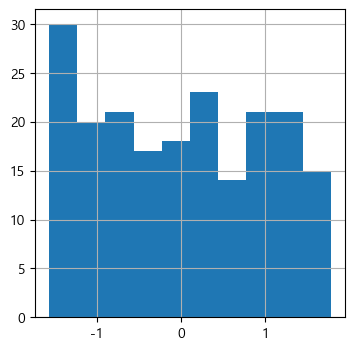

In [51]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 'TV' 열에 대해 표준화 수행
pre_c_df['Radio'] = scaler.fit_transform(pre_c_df[['Radio']])

# 결과 확인
pre_c_df['Radio'].hist(figsize=(4,4))

In [45]:
a1 = pre_c_df['Radio'] >= -1.96
a2 = pre_c_df['Radio'] <= 1.96
a = a1 & a2

pre_c_df = pre_c_df.loc[pre_c_df[a].index].reset_index(drop=True)

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

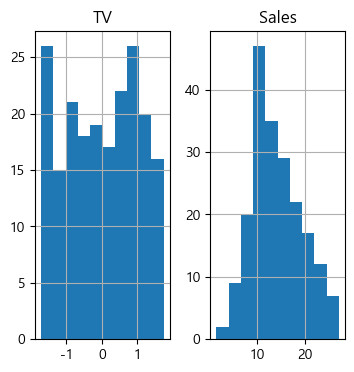

In [167]:
pre_df.hist(figsize=(4,4))

array([[<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

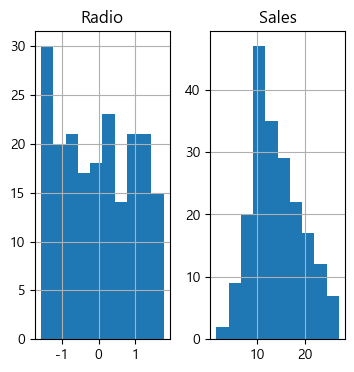

In [52]:
pre_c_df.hist(figsize=(4,4))

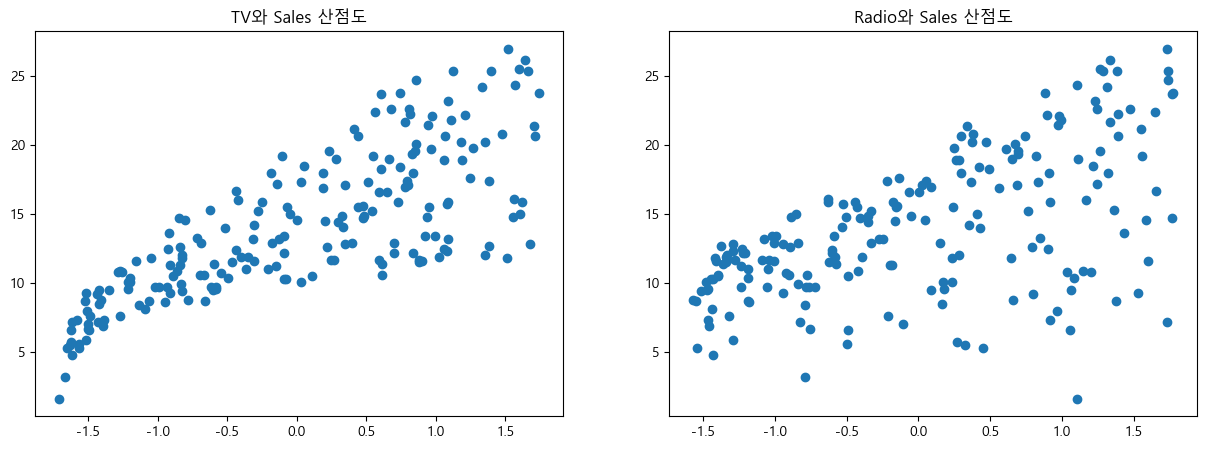

In [95]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1 ,2 ,figsize=(15,5))
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

axes[0].scatter(pre_df['TV'], pre_df['Sales'])
axes[0].set_title('TV와 Sales 산점도')
axes[1].scatter(pre_c_df['Radio'] , pre_c_df['Sales'])
axes[1].set_title('Radio와 Sales 산점도')

plt.show()

### W , b를 0으로 초기화 하여 작업

In [168]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


X_train = torch.FloatTensor(X_train.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 가중치 초기화 (0으로 초기화)
W = torch.zeros(1, requires_grad=True)

# 편향 초기화 (0으로 초기화)
b = torch.zeros(1, requires_grad=True)

# H = W * X_train + b

# l_r = LinearRegressionModel()
optimizer = SGD([W, b], lr=0.09)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = W * X_train + b
    loss = torch.mean((H - y_train) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W.item(), b.item(), loss.item()))


 100/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 200/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 300/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 400/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 500/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 600/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 700/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 800/10000: W: 4.0032, b: 14.0755, loss: 10.7957
 900/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1000/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1100/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1200/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1300/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1400/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1500/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1600/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1700/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1800/10000: W: 4.0032, b: 14.0755, loss: 10.7957
1900/10000: W: 4.0032, b: 14.0755, loss: 10.7957
2000/10000: W: 4.0032, b: 14.0755, loss: 10.7957
2100/10000: W: 4.003

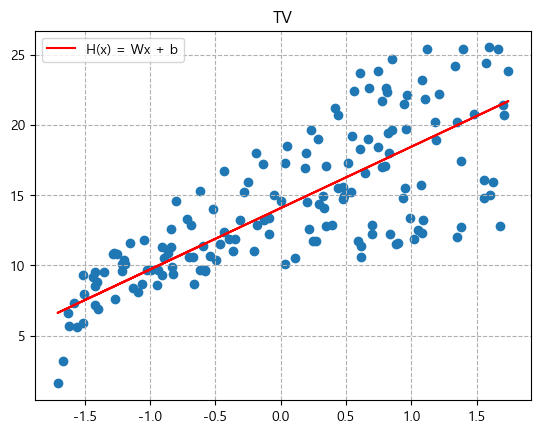

In [169]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X_train, y_train)
plt.plot(X_train, 4.3632 * X_train + 14.0755, color="red", label='H(x) = Wx + b')
plt.grid(visible=True, linestyle='--')
plt.legend()
plt.title('TV')
plt.show()

### 클래스 선언하여 작업

In [171]:
# 클래스 선언 작업

from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self) :
        super().__init__()
        self.linear = Linear(1, 1)

    # model(X_train) 호출 시 forward(X_train) 자동 실행 
    def forward(self, x):
        # 전처리 과정도 넣을 수 있음 
        return self.linear(x)

In [172]:
# 클래스 선언하여 작업

from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

from sklearn.model_selection import train_test_split
features1, targets1 = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X1_train, X1_test, y1_train, y1_test = \
train_test_split(features1, targets1, test_size=0.2, random_state=124)


X1_train = torch.FloatTensor(X1_train.values).view(-1, 1)
y1_train = torch.FloatTensor(y1_train.values).view(-1, 1)

X1_test = torch.FloatTensor(X1_test.values).view(-1, 1)
y1_test = torch.FloatTensor(y1_test.values).view(-1, 1)

l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(), lr=0.1)

epochs = 5000

for epoch in range(1, epochs + 1):
    H1 = l_r(X1_train)
    loss = mse_loss(H1, y1_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

 100/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 200/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 300/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 400/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 500/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 600/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 700/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 800/5000: W: 3.1026, b: 14.2680, loss: 16.5298
 900/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1000/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1100/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1200/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1300/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1400/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1500/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1600/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1700/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1800/5000: W: 3.1026, b: 14.2680, loss: 16.5298
1900/5000: W: 3.1026, b: 14.2680, loss: 16.5298
2000/5000: W: 3.1026, b: 14.2680, loss: 16.5298
2100/5000: W: 3.1026, b: 14.2680, loss: 

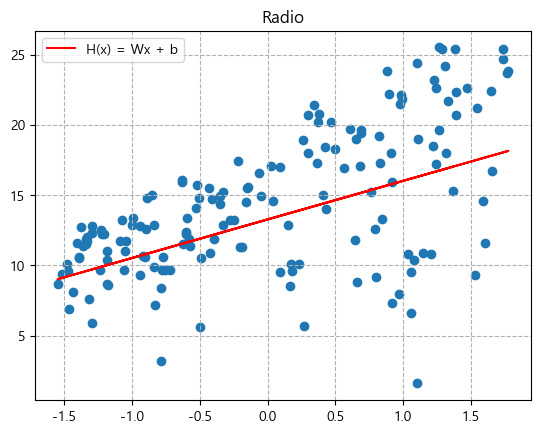

In [147]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X1_train, y1_train)
plt.plot(X1_train, 2.7425 * X1_train + 13.2680, color="red", label='H(x) = Wx + b')
plt.grid(visible=True, linestyle='--')
plt.legend()
plt.title('Radio')
plt.show()

In [96]:
H = 5.1025 * X_test + 14.2680
# RMSE
print(np.sqrt(mse_loss(H, y_test).item()))

3.1935705085975146


In [106]:
H1 = 2.1025 * X1_test + 13.2680
# RMSE
print(np.sqrt(mse_loss(H1, y1_test).item()))

4.821006885636798


#### 📊 예측값 VS 실제 값 (TV)

In [109]:
# print(y_train)
# print(5.1025 * X_train + 14.2680)

# print('=' * 40)

print(('정답', '예측'))
for eval in zip(y_train, 5.1025 * X_train + 14.2680):
    print(eval)

('정답', '예측')
(tensor([5.9000]), tensor([6.5318]))
(tensor([22.2000]), tensor([20.4560]))
(tensor([25.4000]), tensor([22.7677]))
(tensor([15.5000]), tensor([19.1094]))
(tensor([25.5000]), tensor([22.4043]))
(tensor([9.7000]), tensor([9.2189]))
(tensor([10.5000]), tensor([14.8374]))
(tensor([21.5000]), tensor([19.0915]))
(tensor([17.3000]), tensor([16.8930]))
(tensor([6.9000]), tensor([7.1455]))
(tensor([19.6000]), tensor([18.6030]))
(tensor([11.7000]), tensor([15.6478]))
(tensor([18.]), tensor([15.2486]))
(tensor([10.8000]), tensor([7.7056]))
(tensor([17.4000]), tensor([21.3318]))
(tensor([12.8000]), tensor([22.8273]))
(tensor([11.7000]), tensor([15.5405]))
(tensor([7.6000]), tensor([7.7830]))
(tensor([11.8000]), tensor([8.9329]))
(tensor([19.4000]), tensor([18.4779]))
(tensor([8.4000]), tensor([8.4861]))
(tensor([10.6000]), tensor([17.4114]))
(tensor([11.4000]), tensor([11.2387]))
(tensor([9.6000]), tensor([8.0690]))
(tensor([19.7000]), tensor([19.1809]))
(tensor([23.2000]), tensor([19

#### 📊 예측값 VS 실제 값 (Radio)

In [110]:
print(('정답', '예측'))
for eval in zip(y1_train, 2.1025 * X1_train + 13.2680):
    print(eval)

('정답', '예측')
(tensor([5.9000]), tensor([10.5473]))
(tensor([22.2000]), tensor([15.1471]))
(tensor([25.4000]), tensor([15.9705]))
(tensor([15.5000]), tensor([12.3645]))
(tensor([25.5000]), tensor([15.9279]))
(tensor([9.7000]), tensor([11.7541]))
(tensor([10.5000]), tensor([10.3344]))
(tensor([21.5000]), tensor([15.3175]))
(tensor([17.3000]), tensor([14.0397]))
(tensor([6.9000]), tensor([10.1924]))
(tensor([19.6000]), tensor([14.7212]))
(tensor([11.7000]), tensor([11.0726]))
(tensor([18.]), tensor([15.1897]))
(tensor([10.8000]), tensor([15.4452]))
(tensor([17.4000]), tensor([12.8046]))
(tensor([12.8000]), tensor([10.5473]))
(tensor([11.7000]), tensor([10.9732]))
(tensor([7.6000]), tensor([10.4905]))
(tensor([11.8000]), tensor([14.6218]))
(tensor([19.4000]), tensor([14.7212]))
(tensor([8.4000]), tensor([11.6121]))
(tensor([10.6000]), tensor([10.3344]))
(tensor([11.4000]), tensor([12.0664]))
(tensor([9.6000]), tensor([13.6422]))
(tensor([19.7000]), tensor([14.5508]))
(tensor([23.2000]), te

### 📌 최소 손실값

In [149]:
# 10000/10000: W: 4.0032, b: 14.0755, loss: 10.7957
H = 4.3632 * X_test + 14.0755
# RMSE
print('TV')
print(np.sqrt(mse_loss(H, y_test).item()))

TV
3.054893701330412


In [160]:
H1 = 2.7425 * X1_test + 12.2680
# RMSE
print('Radio')
print(np.sqrt(mse_loss(H1, y1_test).item()))

Radio
4.847378067285166


## **Sklearn - LinearRegression Task**

In [174]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features , targets = pre_df.iloc[:,:-1] , pre_df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('W:{:.4f}, b:{:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W:4.0032, b:14.0755


#### pytorch W, b 값(TV) : 4.3632 , 14.0755

In [175]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('loss : {:.4f}, RMSE_loss : {:.4f}'.format(mean_squared_error(y_test, prediction), 
                                                np.sqrt(mean_squared_error(y_test, prediction))))

loss : 9.4174, RMSE_loss : 3.0688


In [176]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features , targets = pre_c_df.iloc[:,:-1] , pre_c_df.iloc[: ,-1]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('W:{:.4f}, b:{:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W:3.1026, b:14.2680


W: 3.1026, b: 14.2680, loss: 16.5298

#### pytorch W, b 값(Radio) : 2.7425 , 12.2680

In [177]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('loss : {:.4f}, RMSE_loss : {:.4f}'.format(mean_squared_error(y_test, prediction), 
                                                np.sqrt(mean_squared_error(y_test, prediction))))

loss : 24.6978, RMSE_loss : 4.9697


### 결론
-> pytorch -> sklearn